In [2]:
# 20.7 CATEGORICAL VARIABLES

In [3]:
      import numpy as np
      import pandas as pd
      import statsmodels.api as sm

      data = "insurance"
      label = "charges"
      df = pd.read_csv('http://www.ishelp.info/data/' + data + '.csv')

      # Generate dummy variables
      for col in df:
        if not pd.api.types.is_numeric_dtype(df[col]):
          df = df.join(pd.get_dummies(df[col], prefix=col))

      # Set label and features
      y = df[label]
      X = df.select_dtypes(np.number).assign(const=1)
      X = X.drop(columns=[label])

      # Run the multiple linear regression model
      model = sm.OLS(y, X)
      results = model.fit()
      print(results.summary())  # View results


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:45:42   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                256.8564     11.899  

In [4]:
      def vif(df):
        import pandas as pd
        from sklearn.linear_model import LinearRegression

        # initialize dictionaries
        vif_dict, tolerance_dict = {}, {}

        # form input data for each exogenous variable
        for col in df:
          y = df[col]
          X = df.drop(columns=[col])

          # extract r-squared from the fit
          r_squared = LinearRegression().fit(X, y).score(X, y)

          # calculate VIF
          vif = 1/(1 - r_squared)
          vif_dict[col] = vif

          # calculate tolerance
          tolerance = 1 - r_squared
          tolerance_dict[col] = tolerance

        return pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})
      
      vif_df = df.select_dtypes(np.number)
      vif_df = vif_df.drop(columns=['charges'])
      vif(vif_df)


,VIF,Tolerance
age,1.016822,0.983456
bmi,1.106630,0.903645
children,1.004011,0.996005
sex_female,inf,0.000000
sex_male,inf,0.000000
smoker_no,inf,0.000000
smoker_yes,inf,0.000000
region_northeast,inf,0.000000
region_northwest,inf,0.000000
region_southeast,inf,0.000000


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [6]:
      #This is the best, most accurate, updated one
      import numpy as np
      import pandas as pd
      import statsmodels.api as sm

      data = "insurance"
      label = "charges"
      df = pd.read_csv('http://www.ishelp.info/data/' + data + '.csv')

      # Generate dummy variables
      for col in df:
        if not pd.api.types.is_numeric_dtype(df[col]):
          df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=True)) # The (drop_first = true) will always drop (any) one (and only one) of the dummy features for each categorical variable. It does not matter which one we drop.

      # Set label and features
      y = df[label]
      X = df.select_dtypes(np.number).assign(const=1)
      X = X.drop(columns=[label])

      # Run the multiple linear regression model
      model = sm.OLS(y, X)
      results = model.fit()
      print(results.summary())  # View results

      # test for collinearity (how much are these columns overlapping each other? We don't want to count them twice)
      #if you have 4 items and 3 are 0, you know the fourth must be a one, meaning you can get rid of the fourth and have a more accurate model. that's how to get rid of vif inf
      vif_df = df.select_dtypes(np.number)
      vif_df = vif_df.drop(columns=['charges'])
      vif(vif_df)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:45:43   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                256.8564     11.899  

,VIF,Tolerance
age,1.016822,0.983456
bmi,1.106630,0.903645
children,1.004011,0.996005
sex_male,1.008900,0.991178
smoker_yes,1.012074,0.988070
region_northwest,1.518823,0.658405
region_southeast,1.652230,0.605243
region_southwest,1.529411,0.653846


In [7]:

df.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [16]:
      def mlr_fit(results, actual):
          import numpy as np
    
          residuals = np.array(actual) - np.array(results.fittedvalues)
          rmse = np.sqrt(sum((residuals**2))/len(actual))
    
          mae = np.mean(abs(np.array(actual) - np.array(results.fittedvalues)))
    
          metrics  = "R-squared:\t" + str(round(results.rsquared, 4)) + "\n"
          metrics += "R2-adjusted:\t" + str(round(results.rsquared_adj, 4)) + "\n"
          metrics += "RMSE:\t\t" + str(round(rmse, 4)) + "\n"
          metrics += "MAE:\t\t" + str(round(mae, 4)) + "\n"
          metrics += "Label mean:\t" + str(round(np.mean(actual), 4))
    
          return metrics
      
      print(mlr_fit(results, df[label]))


R-squared:	0.7509
R2-adjusted:	0.7494
RMSE:		6041.6797
MAE:		4170.8869
Label mean:	13270.4223


In [9]:
      # Run the multiple linear regression model
      model = sm.OLS(y, X)
      results = model.fit()
      print(results.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:45:43   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                256.8564     11.899  

In [10]:
# 20.8 FEATURE SCALING

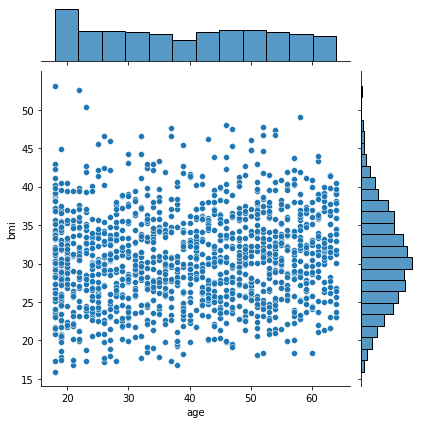

In [11]:
        import pandas as pd
        import numpy as np
        import seaborn as sns

        df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')

        # Generate dummy features
        for col in df:
          if not pd.api.types.is_numeric_dtype(df[col]):
            df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=True))

        # Remove original categorical features
        og_df = df.select_dtypes(np.number)

        sns.jointplot(df.age, df.bmi);


In [12]:
          from sklearn import preprocessing

          # converts the raw data for both features to a Z-SCORE and returns
          # results in a numpy array of as many features as you input
          # Z-SCORE = how many stDev from the mean you are
                #that's what the chart below shows. exactly how many stDev from the mean each of these are
          # Y = x-bar/stDev
          df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(og_df), columns=og_df.columns)
          df_zscore
          


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,0.989591,-0.507463,1.765481,-0.611324,-0.566418
1334,-1.509965,0.206139,-0.908614,-0.914002,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418
1335,-1.509965,1.014878,-0.908614,-0.961596,-1.010519,-0.507463,-0.566418,1.635795,-0.566418
1336,-1.296362,-0.797813,-0.908614,-0.930362,-1.010519,-0.507463,-0.566418,-0.611324,1.765481


In [13]:
          # Min-Max Normalization
          # Y = (X-Xmin)/(Xmax-Xmin)
          # Scales everything between 0 & 1
          df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(og_df), columns=og_df.columns)
          df_minmax.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,1.0,0.0,1.0,0.0,0.0


Mean:	-7.832963641600507e-17
Std:	1.000373901676928
Min:	-1.003557345258499
Max:	4.17166316317004


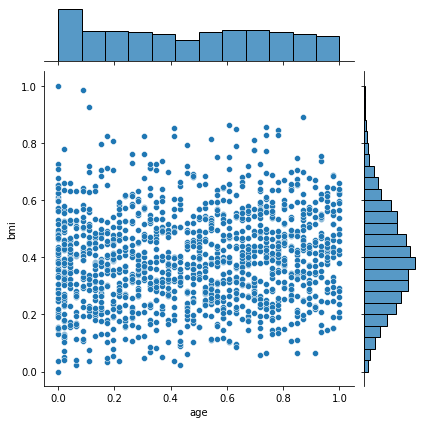

In [14]:
          # It looks exactly the same, but the x and y axes range from 0 to 1.
          sns.jointplot(df_minmax.age, df_minmax.bmi)

          print("Mean:\t" + str(df_zscore.charges.mean()))
          print("Std:\t" + str(df_zscore.charges.std()))
          print("Min:\t" + str(df_zscore.charges.min()))
          print("Max:\t" + str(df_zscore.charges.max()))


In [15]:
          #The coef and std err scores are all different, but everything else has the same signs (-/+), t scores, and p values. The only real difference is that the ceofficients are now comparable because they are all on the same scale. As a result, if you plot the coefficients and the t-test scores, they will be proportionally similar. They aren't perfectly proportional because some of the features are not normally distributed.          
          import statsmodels.api as sm

          y = df_minmax.charges
          X = df_minmax.drop(columns=['charges']).assign(const=1)

          model = sm.OLS(y, X)
          results = model.fit()
          print(results.summary())

          #Keep running it and it should work


LinAlgError: SVD did not converge

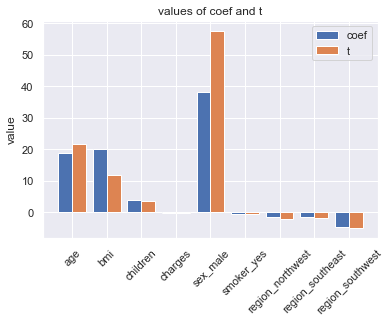

In [47]:
          import matplotlib.pyplot as plt
          
          fig, ax = plt.subplots()
          x = np.arange(len(df_minmax.columns))
          width = .20
          rects1 = ax.bar(x - width, results.params * 100, width=.4, label='coef',) # multiplied t by 100 just to get it on a similar scale
          rects2 = ax.bar(x + width, results.tvalues, width=.4, label='t')

          ax.set_ylabel('value')
          ax.set_title('values of coef and t')
          ax.set_xticks(x)
          ax.set_xticklabels(df_minmax.columns)
          plt.xticks(rotation=45)
          ax.legend()
          plt.show()


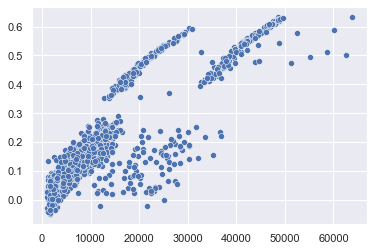

In [48]:
        import matplotlib.pyplot as plt
        import seaborn as sns; sns.set()

        pred_val = results.fittedvalues.copy()
        true_val = df[label].values.copy()
        residual = true_val - pred_val

        ax = sns.scatterplot(x=residual, y=pred_val)


In [51]:
        # Function to handle VIF scores; only pass in features; not the label
        import pandas as pd
        from sklearn.linear_model import LinearRegression

        def vif(df):
          # initialize dictionaries
          vif_dict, tolerance_dict = {}, {}

          # form input data for each exogenous variable
          for col in df.drop(columns=['const']):
            y = df[col]
            X = df.drop(columns=[col])
            
            # extract r-squared from the fit
            r_squared = LinearRegression().fit(X, y).score(X, y)

            # calculate VIF
            if r_squared < 1: # Prevent division by zero runtime error
              vif = 1/(1 - r_squared) 
            else:
              vif = 1
            vif_dict[col] = vif

            # calculate tolerance
            tolerance = 1 - r_squared
            tolerance_dict[col] = tolerance

          return pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})
        vif(X)
          

,VIF,Tolerance
age,1.016822,0.983456
bmi,1.106630,0.903645
children,1.004011,0.996005
sex_male,1.008900,0.991178
smoker_yes,1.012074,0.988070
region_northwest,1.518823,0.658405
region_southeast,1.652230,0.605243
region_southwest,1.529411,0.653846


In [ ]:
# 20.9 ASSUMPTION TESTS

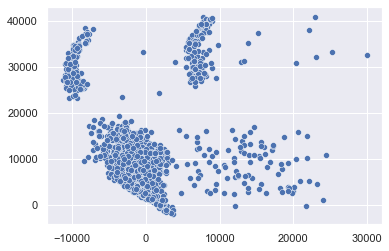

In [9]:
      # Residual Plot
      import matplotlib.pyplot as plt
      import seaborn as sns; sns.set()

      pred_val = results.fittedvalues.copy()
      true_val = df[label].values.copy()
      residual = true_val - pred_val

      ax = sns.scatterplot(x=residual, y=pred_val)


0.8987412388550611

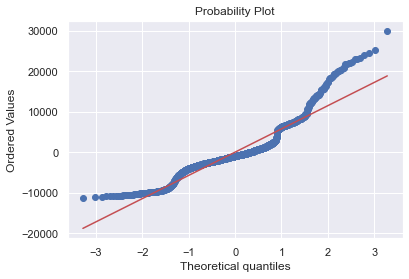

In [10]:
      # Normal Probability Plot
      import scipy as sp
      fig, ax = plt.subplots()
      _, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
      r**2


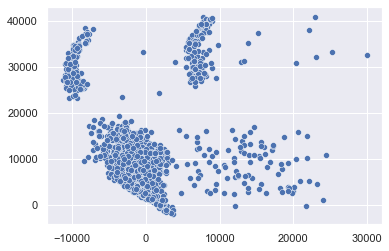

In [11]:
        #Residual plots should look random. If you can't tell if it is random or not, use the chart in the next cell
        import matplotlib.pyplot as plt
        import seaborn as sns; sns.set()

        pred_val = results.fittedvalues.copy()
        true_val = df[label].values.copy()
        residual = true_val - pred_val

        ax = sns.scatterplot(x=residual, y=pred_val)

0.8987412388550611

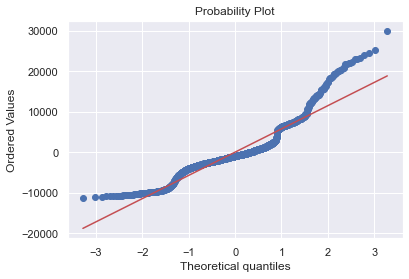

In [12]:
        #if it is evenly distributed, it will be an almost straight line
        # this one is skewed so it doesn't really follow the best fit line
        # also gives r2. Ideal r2 needs to be between .9 and .95 to say whether or not it is skewed
        import scipy as sp
        fig, ax = plt.subplots()
        _, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
        r**2

        #low r2 and not random risidual plot: probs not normally distributed. Better use a minmax not a standard scalar

In [16]:
        # Function to handle VIF scores; only pass in features; not the label
        import pandas as pd
        from sklearn.linear_model import LinearRegression

        def vif(df):
          # initialize dictionaries
          vif_dict, tolerance_dict = {}, {}

          # form input data for each exogenous variable
          for col in df.drop(columns=['const']):
            y = df[col]
            X = df.drop(columns=[col])
            
            # extract r-squared from the fit
            r_squared = LinearRegression().fit(X, y).score(X, y)

            # calculate VIF
            if r_squared < 1: # Prevent division by zero runtime error
              vif = 1/(1 - r_squared) 
            else:
              vif = 1
            vif_dict[col] = vif

            # calculate tolerance
            tolerance = 1 - r_squared
            tolerance_dict[col] = tolerance

          return pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})
        vif(X)

        # ideal VIF = anything under 3 (means there is practically no overlap between these)
                #VIF scores below 3 (great), 5 (good), 10 (okay) are ideal 
        # tolerance scores above 0.1 (good enough) or 0.2 (better) indicate acceptable levels of multi-collinearity. (there is not a lot of overlap)



,VIF,Tolerance
age,1.016822,0.983456
bmi,1.106630,0.903645
children,1.004011,0.996005
sex_male,1.008900,0.991178
smoker_yes,1.012074,0.988070
region_northwest,1.518823,0.658405
region_southeast,1.652230,0.605243
region_southwest,1.529411,0.653846
